<a href="https://colab.research.google.com/github/HannaPo/ML-zoomcamp/blob/master/02_regression_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
!wget $data

--2023-09-23 18:57:31--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.1’

housing.csv.1       100%[===================>]   1.36M  --.-KB/s    in 0.07s   

2023-09-23 18:57:32 (19.0 MB/s) - ‘housing.csv.1’ saved [1423529/1423529]



In [3]:
df = pd.read_csv('housing.csv')

In [4]:
df.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  ho

In [5]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [6]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

longitude
[-122.23 -122.22 -122.24 -122.25 -122.26]
844

latitude
[37.88 37.86 37.85 37.84 37.83]
862

housing_median_age
[41. 21. 52. 42. 50.]
52

total_rooms
[ 880. 7099. 1467. 1274. 1627.]
5926

total_bedrooms
[ 129. 1106.  190.  235.  280.]
1923

population
[ 322. 2401.  496.  558.  565.]
3888

households
[ 126. 1138.  177.  219.  259.]
1815

median_income
[8.3252 8.3014 7.2574 5.6431 3.8462]
12928

median_house_value
[452600. 358500. 352100. 341300. 342200.]
3842

ocean_proximity
['near_bay' '<1h_ocean' 'inland' 'near_ocean' 'island']
5



In [7]:
df = df[df['ocean_proximity'].isin(['<1h_ocean', 'inland'])]

In [8]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

longitude
[-121.97 -121.99 -121.96 -121.98 -122.  ]
818

latitude
[37.64 37.61 37.57 37.58 37.49]
834

housing_median_age
[32.  9. 21. 15. 20.]
52

total_rooms
[1283. 3666. 4342. 3575. 4126.]
5428

total_bedrooms
[ 194.  711.  783.  597. 1031.]
1822

population
[ 485. 2341. 2172. 1777. 2079.]
3683

households
[171. 703. 789. 559. 975.]
1707

median_income
[6.0574 4.6458 4.6146 5.7192 3.6832]
10434

median_house_value
[431000. 217000. 247600. 283500. 216900.]
3493

ocean_proximity
['<1h_ocean' 'inland']
2



In [9]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [10]:
selected_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households",
              "median_income", "median_house_value"]
df = df[selected_cols]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


**Question 1: Missing values**
There's one feature with missing values. What is it?


In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

**Question 2: Median**
What's the median (50% percentile) for variable 'population'?


In [12]:
median_population = np.median(df['population'])
median_population

1195.0

In [13]:
price_logs = np.log1p(df.median_house_value)
price_logs

701      12.973866
830      12.287657
859      12.419574
860      12.554971
861      12.287196
           ...    
20635    11.265758
20636    11.252872
20637    11.432810
20638    11.346883
20639    11.400887
Name: median_house_value, Length: 15687, dtype: float64

<Axes: xlabel='median_house_value', ylabel='Count'>

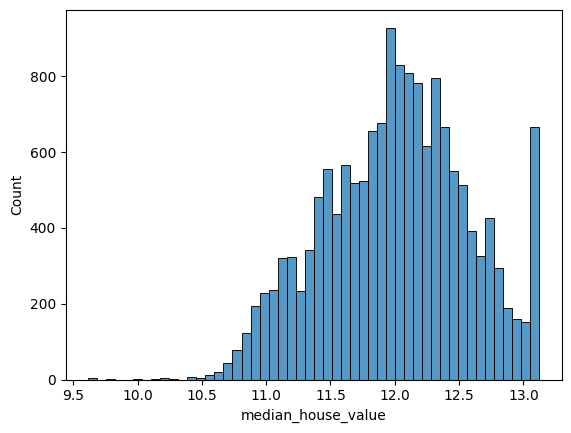

In [14]:
sns.histplot(price_logs, bins=50)

**Split and Shuffle the dataset**

In [15]:
n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

In [16]:
n_val, n_test, n_train

(3137, 3137, 9413)

In [17]:
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [18]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [19]:
print(df_train.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


In [20]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

Question 3: Which option gives better RMSE?